# **URL Feature Extraction**

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-dataset/Phishing_dataset_02.csv
/kaggle/input/phishing-dataset/phishing_site_urls.csv
/kaggle/input/phishing-dataset/Phishing_dataset_03.csv
/kaggle/input/phishing-dataset/Phishing_dataset_01.csv
/kaggle/input/phishing-dataset/malicious_phish.csv
/kaggle/input/phishing-dataset/Phishing_dataset_04.csv


In [5]:
# Load the dataset
data = pd.read_csv("/kaggle/input/phishing-dataset/Phishing_dataset_02.csv")

# print number of phishing and legitimate urls
print(data['status'].value_counts())

# print the column names
print(data.columns)

data.head()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64
Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdo

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [6]:
# drop unnecessary columns from the dataframe
data = data.drop(data.columns[1:66], axis=1)
data = data.drop(data.columns[2:3], axis=1)
data = data.drop(data.columns[4:6], axis=1)
data = data.drop(data.columns[10:12], axis=1)

# print number of phishing and legitimate urls
print(data['status'].value_counts())

# print the column names
print(data.columns)

data.head()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64
Index(['url', 'login_form', 'links_in_tags', 'submit_email', 'sfh', 'iframe',
       'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
       'domain_with_copyright', 'whois_registered_domain',
       'domain_registration_length', 'domain_age', 'web_traffic', 'dns_record',
       'google_index', 'page_rank', 'status'],
      dtype='object')


,url,login_form,links_in_tags,submit_email,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,80.000000,0,0,0,0,0.0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,0,100.000000,0,0,0,0,100.0,0,0,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,0,100.000000,0,0,0,0,100.0,0,0,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,100.000000,0,0,0,0,62.5,0,0,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,1,76.470588,0,0,0,0,0.0,0,0,1,0,224,8175,8725,0,0,6,legitimate


## Feature Extraction Functions

In [7]:
# Import headers

import re
from urllib.parse import *

In [8]:
# Embedded Domain: Examines dot-separated domain/hostname patterns in the URL path.

def embedded_domain(url):
    # Extract the domain from the URL
    domain = urlparse(url).netloc
    # Split the domain into its components
    domain_parts = domain.split('.')
    
    # Checking whether the url is similar to a well-known domain
    # If it is, we return 1, else 0
    well_known_URLs = ['google', 'facebook', 'twitter', 'linkedin', 'youtube', 'instagram', 'pinterest', 'amazon', 'snapchat', 'reddit', 'flickr', 'whatsapp', 'quora', 'vimeo', 'periscope', 'vine', 'meetup', 'tagged', 'askfm', 'meetme', 'meetup', 'myspace', 'stumbleupon', 'delicious', 'digg', 'slashdot', 'fark', 'newsvine', 'foursquare', 'yelp', 'tripadvisor', 'zomato', 'opentable']
    
    for well_known_URL in well_known_URLs:
        for domain_part in domain_parts:
            if len(set(domain_part)&set(well_known_URL)) == len(well_known_URL) - 1:
                return 1
    return -1


# Example usage
url1 = "http://www.google.com"
url2 = "http://www.facehook.com"

print(embedded_domain(url1))
print(embedded_domain(url2))

-1
1


In [9]:
# IP Address: Attackers often employ IP address in the URL
# to disguise a webpage’s malicious nature, while legitimate
# websites almost always use domain names instead of IP
# addresses due to their easy memorability.

def having_ip_address(url):
    # Regular expression to match IP address pattern
    ip_address_pattern = r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b'

    # Search for the pattern in the URL
    match = re.search(ip_address_pattern, url)

    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
    
# Example usage
url1 = "https://www.google.com"
url2 = "172.0.0.1"

print(having_ip_address(url1))
print(having_ip_address(url2))

1
-1


In [10]:
# Number of dots in URL: Phishing pages tend to use more
# dots in their URLs than the legitimate sites.
def no_of_dots(url):
    return url.count('.')

# Example usage
url = "https://www.google.com"

print(no_of_dots(url))

2


In [11]:
def sum_count_special_characters(url):
    special_chars = ['@','?','-','=','#','%','+','$','!','*',',','//',';',' ','&','_',':','|','/']
    #     special_characters = ['@',',','$',';',' ','%20','&','/','=','%','?','_','-',':','*','|']

    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars
# dataset['sum_count_special_chars'] = dataset['url'].apply(lambda x: sum_count_special_characters(x))
# dataset
url = 'https://www.google.com/search?q=feature+extraction+from+url&oq=feature+extraction+from+url&aqs=chrome..69i57j0l7.10257j0j7&sourceid=chrome&ie=UTF-8'
print(sum_count_special_characters(url))

# Count the total number of special characters in the URL
# def count_special_chars(url):
#     special_chars = [';', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '+', '-', '=', '{', '}', '[', ']', '|', '\\', ':', '"', "'", '<', '>', ',', '.', '?', '/']
#     count = 0
#     for char in url:
#         if char in special_chars:
#             count += 1
#     return count

# # Example usage
# url = 'http://www.google.com'

# print(count_special_chars(url))

21


In [12]:
# Lexical features: The URL string is broken down into
# multiple tokens. Each token constitutes a binary feature.
# The delimiters to obtain the tokens are ‘/’, ‘?’, ‘.’, ‘=’, ‘ ’,
# ‘&’, and ‘-’

def extract_lexical_features(url):
    # Parse the URL
    parsed_url = urlparse(url)

    # Define delimiters
    delimiters = ['/', '?', '.', '=', ' ', '&', '-']

    # Split the url into tokens based on the delimiters
    tokens = re.split('|'.join(map(re.escape, delimiters)), parsed_url.geturl())

    # Remove empty tokens
    tokens = list(filter(None, tokens))

    # Initialize a dictionary to store binary features for each token
    lexical_features = {}

    # Extract binary features for each token
    for token in tokens:
        lexical_features[token] = 1
    
    return lexical_features

# Example usage

url = 'https://www.google.com/search?q=feature+extraction+from+url&oq=feature+extraction+from+url&aqs=chrome..69i57j0l7.10257j0j7&sourceid=chrome&ie=UTF-8'

print(extract_lexical_features(url))

{'https:': 1, 'www': 1, 'google': 1, 'com': 1, 'search': 1, 'q': 1, 'feature+extraction+from+url': 1, 'oq': 1, 'aqs': 1, 'chrome': 1, '69i57j0l7': 1, '10257j0j7': 1, 'sourceid': 1, 'ie': 1, 'UTF': 1, '8': 1}


In [13]:
# Number of sensitive words in URL: In (Garera et al., 2007),
# Garera et al summarized a set of eight sensitive words that
# frequently appear in phishing URLs. This is a numeric feature with a range of 0 to 8.

def no_of_sensitive_words(url):
    sensitive_words = ['confirm', 'account', 'banking', 'secure', 'ebayisapi', 'webscr', 'login', 'signin']
    count = 0
    for word in sensitive_words:
        if word in url:
            count += 1
    return count

# Example usage
url1 = "https://www.google.com"
url2 = "http://www.abc.com/confirm"

print(no_of_sensitive_words(url1))
print(no_of_sensitive_words(url2))

0
1


In [14]:
# Out-of-Position Top Level Domain (TLD): Checks for
# unusual positioning of TLDs in the URL.

def out_of_position_tld(url):
    tld = ['com', 'org', 'net', 'edu', 'gov', 'in']
    
    # domain = urlparse(url).netloc
    # check if the TLD is in the middle of the domain
    tokens = url.split('.')
    for i in range(len(tokens) - 1):
        if tokens[i] in tld:
            return -1
    return 1

# Example usage
url1 = 'http://www.google.com'
url2 = 'http://www.google.com.in'
    
print(out_of_position_tld(url1))
print(out_of_position_tld(url2))

1
-1


In [15]:
# Check if the website is using HTTPS
def https_token(url):
    https_tokens = url.split('//')[0]
    if https_tokens == 'https:':
        return 1
    else:
        return -1

# Example usage
url1 = 'http://www.google.com'
url2 = 'https://www.google.com'

print(https_token(url1))
print(https_token(url2))

-1
1


In [16]:
# Get the length of the URL
def url_length(url):
    return len(url)

In [17]:
# If the URL is using Shortening Services, the value assigned to this feature is 1 (phishing) or else -1 (legitimate).

# listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

# Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return -1

# Example usage
url1 = 'http://www.google.com'
url2 = 'https://goo.gl'

print(tinyURL(url1))
print(tinyURL(url2))

-1
1


In [18]:
# Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return -1            # legitimate
    
# Example usage
url1 = 'http://www.google.com'
url2 = 'http://www.go-ogle.com'

print(prefixSuffix(url1))
print(prefixSuffix(url2))

-1
1


In [19]:
# Apply the feature extraction functions to the URL column of the filtered data
data.loc[:,'embedded_domain'] = data.loc[:,'url'].apply(embedded_domain)
data.loc[:,'having_ip_address'] = data.loc[:,'url'].apply(having_ip_address)
data.loc[:,'no_of_dots'] = data.loc[:,'url'].apply(no_of_dots)
data.loc[:,'lexical_features'] = data.loc[:,'url'].apply(extract_lexical_features)
data.loc[:,'no_of_sensitive_words'] = data.loc[:,'url'].apply(no_of_sensitive_words)
data.loc[:,'out_of_position_tld'] = data.loc[:,'url'].apply(out_of_position_tld)
data.loc[:,'https_token'] = data.loc[:,'url'].apply(https_token)
data.loc[:,'url_length'] = data.loc[:,'url'].apply(url_length)
data.loc[:,'tinyURL'] = data.loc[:,'url'].apply(tinyURL)
data.loc[:,'prefixSuffix'] = data.loc[:,'url'].apply(prefixSuffix)

data.head()

,url,login_form,links_in_tags,submit_email,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,...,embedded_domain,having_ip_address,no_of_dots,lexical_features,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix
0,http://www.crestonwood.com/router.php,0,80.000000,0,0,0,0,0.0,0,0,...,-1,1,3,"{'http:': 1, 'www': 1, 'crestonwood': 1, 'com'...",0,1,-1,37,-1,-1
1,http://shadetreetechnology.com/V4/validation/a...,0,100.000000,0,0,0,0,100.0,0,0,...,1,1,1,"{'http:': 1, 'shadetreetechnology': 1, 'com': ...",0,1,-1,77,-1,-1
2,https://support-appleld.com.secureupdate.duila...,0,100.000000,0,0,0,0,100.0,0,0,...,1,1,4,"{'https:': 1, 'support': 1, 'appleld': 1, 'com...",1,-1,1,126,-1,1
3,http://rgipt.ac.in,0,100.000000,0,0,0,0,62.5,0,0,...,-1,1,2,"{'http:': 1, 'rgipt': 1, 'ac': 1, 'in': 1}",0,1,-1,18,-1,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,1,76.470588,0,0,0,0,0.0,0,0,...,-1,1,2,"{'http:': 1, 'www': 1, 'iracing': 1, 'com': 1,...",0,1,-1,55,-1,-1


In [21]:
data.loc[:,'no_of_sp_chars'] = data.loc[:,'url'].apply(sum_count_special_characters)
data.head()

,url,login_form,links_in_tags,submit_email,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,...,having_ip_address,no_of_dots,lexical_features,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,no_of_sp_chars
0,http://www.crestonwood.com/router.php,0,80.000000,0,0,0,0,0.0,0,0,...,1,3,"{'http:': 1, 'www': 1, 'crestonwood': 1, 'com'...",0,1,-1,37,-1,-1,4
1,http://shadetreetechnology.com/V4/validation/a...,0,100.000000,0,0,0,0,100.0,0,0,...,1,1,"{'http:': 1, 'shadetreetechnology': 1, 'com': ...",0,1,-1,77,-1,-1,6
2,https://support-appleld.com.secureupdate.duila...,0,100.000000,0,0,0,0,100.0,0,0,...,1,4,"{'https:': 1, 'support': 1, 'appleld': 1, 'com...",1,-1,1,126,-1,1,15
3,http://rgipt.ac.in,0,100.000000,0,0,0,0,62.5,0,0,...,1,2,"{'http:': 1, 'rgipt': 1, 'ac': 1, 'in': 1}",0,1,-1,18,-1,-1,3
4,http://www.iracing.com/tracks/gateway-motorspo...,1,76.470588,0,0,0,0,0.0,0,0,...,1,2,"{'http:': 1, 'www': 1, 'iracing': 1, 'com': 1,...",0,1,-1,55,-1,-1,8


In [22]:
label = data.pop('status')  # Remove column 'B' and return it
data['status'] = label
data.head()

,url,login_form,links_in_tags,submit_email,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,...,no_of_dots,lexical_features,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,no_of_sp_chars,status
0,http://www.crestonwood.com/router.php,0,80.000000,0,0,0,0,0.0,0,0,...,3,"{'http:': 1, 'www': 1, 'crestonwood': 1, 'com'...",0,1,-1,37,-1,-1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,0,100.000000,0,0,0,0,100.0,0,0,...,1,"{'http:': 1, 'shadetreetechnology': 1, 'com': ...",0,1,-1,77,-1,-1,6,phishing
2,https://support-appleld.com.secureupdate.duila...,0,100.000000,0,0,0,0,100.0,0,0,...,4,"{'https:': 1, 'support': 1, 'appleld': 1, 'com...",1,-1,1,126,-1,1,15,phishing
3,http://rgipt.ac.in,0,100.000000,0,0,0,0,62.5,0,0,...,2,"{'http:': 1, 'rgipt': 1, 'ac': 1, 'in': 1}",0,1,-1,18,-1,-1,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,1,76.470588,0,0,0,0,0.0,0,0,...,2,"{'http:': 1, 'www': 1, 'iracing': 1, 'com': 1,...",0,1,-1,55,-1,-1,8,legitimate


In [23]:
# print the value counts of each feature
for col in data.columns[1:]:
    print(data[col].value_counts())

login_form
0    10703
1      727
Name: count, dtype: int64
links_in_tags
0.000000      3403
100.000000    2851
50.000000      453
66.666667      345
75.000000      195
              ... 
68.000000        1
16.000000        1
48.780488        1
13.043478        1
91.176471        1
Name: count, Length: 473, dtype: int64
submit_email
0    11430
Name: count, dtype: int64
sfh
0    11430
Name: count, dtype: int64
iframe
0    11415
1       15
Name: count, dtype: int64
popup_window
0    11361
1       69
Name: count, dtype: int64
safe_anchor
0.000000      4438
100.000000    1732
50.000000      337
25.000000      319
14.285714      225
              ... 
32.142857        1
75.806452        1
87.272727        1
11.956522        1
17.500000        1
Name: count, Length: 1083, dtype: int64
onmouseover
0    11417
1       13
Name: count, dtype: int64
right_clic
0    11414
1       16
Name: count, dtype: int64
domain_with_copyright
0    6406
1    5024
Name: count, dtype: int64
whois_registered_domain


In [35]:
# save the data to a new csv file named 'Data_processed.csv'
data.to_csv('/kaggle/working/Data_processed.csv', index=False)

In [24]:
data.head()

,url,login_form,links_in_tags,submit_email,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,...,no_of_dots,lexical_features,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,no_of_sp_chars,status
0,http://www.crestonwood.com/router.php,0,80.000000,0,0,0,0,0.0,0,0,...,3,"{'http:': 1, 'www': 1, 'crestonwood': 1, 'com'...",0,1,-1,37,-1,-1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,0,100.000000,0,0,0,0,100.0,0,0,...,1,"{'http:': 1, 'shadetreetechnology': 1, 'com': ...",0,1,-1,77,-1,-1,6,phishing
2,https://support-appleld.com.secureupdate.duila...,0,100.000000,0,0,0,0,100.0,0,0,...,4,"{'https:': 1, 'support': 1, 'appleld': 1, 'com...",1,-1,1,126,-1,1,15,phishing
3,http://rgipt.ac.in,0,100.000000,0,0,0,0,62.5,0,0,...,2,"{'http:': 1, 'rgipt': 1, 'ac': 1, 'in': 1}",0,1,-1,18,-1,-1,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,1,76.470588,0,0,0,0,0.0,0,0,...,2,"{'http:': 1, 'www': 1, 'iracing': 1, 'com': 1,...",0,1,-1,55,-1,-1,8,legitimate


In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   login_form                  11430 non-null  int64  
 2   links_in_tags               11430 non-null  float64
 3   submit_email                11430 non-null  int64  
 4   sfh                         11430 non-null  int64  
 5   iframe                      11430 non-null  int64  
 6   popup_window                11430 non-null  int64  
 7   safe_anchor                 11430 non-null  float64
 8   onmouseover                 11430 non-null  int64  
 9   right_clic                  11430 non-null  int64  
 10  domain_with_copyright       11430 non-null  int64  
 11  whois_registered_domain     11430 non-null  int64  
 12  domain_registration_length  11430 non-null  int64  
 13  domain_age                  114

In [26]:
print(data.describe())

         login_form  links_in_tags  submit_email      sfh        iframe  \
count  11430.000000   11430.000000       11430.0  11430.0  11430.000000   
mean       0.063605      51.978211           0.0      0.0      0.001312   
std        0.244058      41.523144           0.0      0.0      0.036204   
min        0.000000       0.000000           0.0      0.0      0.000000   
25%        0.000000       0.000000           0.0      0.0      0.000000   
50%        0.000000      60.000000           0.0      0.0      0.000000   
75%        0.000000      98.061004           0.0      0.0      0.000000   
max        1.000000     100.000000           0.0      0.0      1.000000   

       popup_window   safe_anchor   onmouseover   right_clic  \
count  11430.000000  11430.000000  11430.000000  11430.00000   
mean       0.006037     37.063922      0.001137      0.00140   
std        0.077465     39.073385      0.033707      0.03739   
min        0.000000      0.000000      0.000000      0.00000   
25% 

In [27]:
data.isnull().sum()

url                           0
login_form                    0
links_in_tags                 0
submit_email                  0
sfh                           0
iframe                        0
popup_window                  0
safe_anchor                   0
onmouseover                   0
right_clic                    0
domain_with_copyright         0
whois_registered_domain       0
domain_registration_length    0
domain_age                    0
web_traffic                   0
dns_record                    0
google_index                  0
page_rank                     0
embedded_domain               0
having_ip_address             0
no_of_dots                    0
lexical_features              0
no_of_sensitive_words         0
out_of_position_tld           0
https_token                   0
url_length                    0
tinyURL                       0
prefixSuffix                  0
no_of_sp_chars                0
status                        0
dtype: int64

In [51]:
# # Drop rows with missing values
# data.dropna(inplace=True)

# # Or impute missing values
# # Example: df.fillna(method='ffill', inplace=True)
# len(data)

In [28]:
data.shape

(11430, 30)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [30]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [32]:
list(data.columns)

['url',
 'login_form',
 'links_in_tags',
 'submit_email',
 'sfh',
 'iframe',
 'popup_window',
 'safe_anchor',
 'onmouseover',
 'right_clic',
 'domain_with_copyright',
 'whois_registered_domain',
 'domain_registration_length',
 'domain_age',
 'web_traffic',
 'dns_record',
 'google_index',
 'page_rank',
 'embedded_domain',
 'having_ip_address',
 'no_of_dots',
 'lexical_features',
 'no_of_sensitive_words',
 'out_of_position_tld',
 'https_token',
 'url_length',
 'tinyURL',
 'prefixSuffix',
 'no_of_sp_chars',
 'status']

In [34]:
df = data.copy()
df.head()

,url,login_form,links_in_tags,submit_email,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,...,no_of_dots,lexical_features,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,no_of_sp_chars,status
0,http://www.crestonwood.com/router.php,0,80.000000,0,0,0,0,0.0,0,0,...,3,"{'http:': 1, 'www': 1, 'crestonwood': 1, 'com'...",0,1,-1,37,-1,-1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,0,100.000000,0,0,0,0,100.0,0,0,...,1,"{'http:': 1, 'shadetreetechnology': 1, 'com': ...",0,1,-1,77,-1,-1,6,phishing
2,https://support-appleld.com.secureupdate.duila...,0,100.000000,0,0,0,0,100.0,0,0,...,4,"{'https:': 1, 'support': 1, 'appleld': 1, 'com...",1,-1,1,126,-1,1,15,phishing
3,http://rgipt.ac.in,0,100.000000,0,0,0,0,62.5,0,0,...,2,"{'http:': 1, 'rgipt': 1, 'ac': 1, 'in': 1}",0,1,-1,18,-1,-1,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,1,76.470588,0,0,0,0,0.0,0,0,...,2,"{'http:': 1, 'www': 1, 'iracing': 1, 'com': 1,...",0,1,-1,55,-1,-1,8,legitimate


In [35]:
df = df.drop(columns=['lexical_features'])

In [36]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')


url has 11429 unique values
login_form contains:			[0 1]
links_in_tags has 473 unique values
submit_email contains:			[0]
sfh contains:			[0]
iframe contains:			[0 1]
popup_window contains:			[0 1]
safe_anchor has 1083 unique values
onmouseover contains:			[0 1]
right_clic contains:			[0 1]
domain_with_copyright contains:			[1 0]
whois_registered_domain contains:			[0 1]
domain_registration_length has 1659 unique values
domain_age has 4430 unique values
web_traffic has 4744 unique values
dns_record contains:			[1 0]
google_index contains:			[1 0]
page_rank has 11 unique values
embedded_domain contains:			[-1  1]
having_ip_address contains:			[ 1 -1]
no_of_dots has 19 unique values
no_of_sensitive_words contains:			[0 1 2 4 3]
out_of_position_tld contains:			[ 1 -1]
https_token contains:			[-1  1]
url_length has 323 unique values
tinyURL contains:			[-1  1]
prefixSuffix contains:			[-1  1]
no_of_sp_chars has 58 unique values
status contains:			['legitimate' 'phishing']


In [37]:
# Define a dictionary to map values
label_mapping = {'legitimate': -1, 'phishing': 1}

# Map the values using the dictionary
df['label'] = df['status'].map(label_mapping)

In [38]:
df = df.drop(columns=['sfh'])
df = df.drop(columns=['submit_email'])

In [39]:
df.head()

,url,login_form,links_in_tags,iframe,popup_window,safe_anchor,onmouseover,right_clic,domain_with_copyright,whois_registered_domain,...,no_of_dots,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,no_of_sp_chars,status,label
0,http://www.crestonwood.com/router.php,0,80.000000,0,0,0.0,0,0,1,0,...,3,0,1,-1,37,-1,-1,4,legitimate,-1
1,http://shadetreetechnology.com/V4/validation/a...,0,100.000000,0,0,100.0,0,0,0,0,...,1,0,1,-1,77,-1,-1,6,phishing,1
2,https://support-appleld.com.secureupdate.duila...,0,100.000000,0,0,100.0,0,0,0,0,...,4,1,-1,1,126,-1,1,15,phishing,1
3,http://rgipt.ac.in,0,100.000000,0,0,62.5,0,0,0,0,...,2,0,1,-1,18,-1,-1,3,legitimate,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,1,76.470588,0,0,0.0,0,0,1,0,...,2,0,1,-1,55,-1,-1,8,legitimate,-1


status
legitimate    5715
phishing      5715
Name: count, dtype: int64


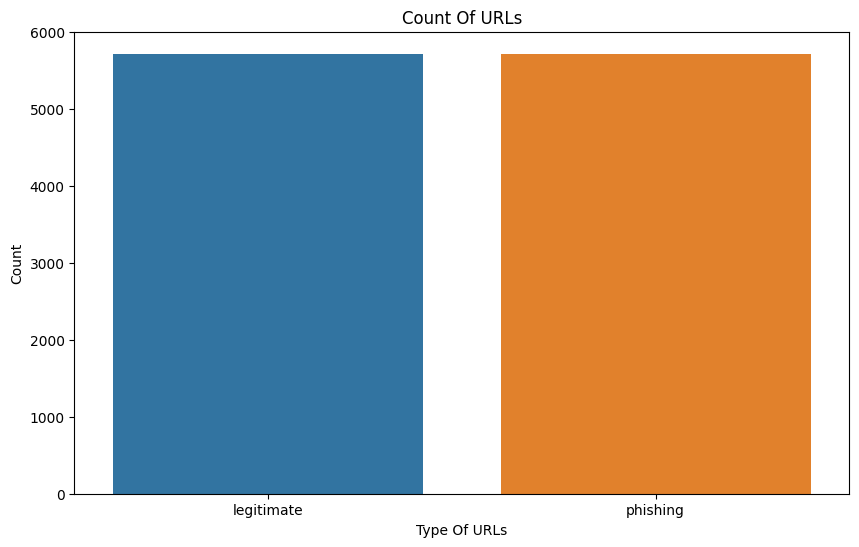

In [40]:
label_counts = df['status'].value_counts()
print(label_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df)
plt.title('Count Of URLs')
plt.xlabel('Type Of URLs')
plt.ylabel('Count')
# plt.tight_layout()
plt.show()

In [41]:
df = df.drop(columns=['status'])
df = df.drop(columns=['url'])

In [43]:
df.describe()

,login_form,links_in_tags,iframe,popup_window,safe_anchor,onmouseover,right_clic,domain_with_copyright,whois_registered_domain,domain_registration_length,...,having_ip_address,no_of_dots,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,no_of_sp_chars,label
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,0.063605,51.978211,0.001312,0.006037,37.063922,0.001137,0.00140,0.439545,0.072878,492.532196,...,0.981802,2.480665,0.112861,0.833071,-0.221872,61.120035,-0.753106,-0.694838,7.466054,0.000000
std,0.244058,41.523144,0.036204,0.077465,39.073385,0.033707,0.03739,0.496353,0.259948,814.769415,...,0.189914,1.369685,0.356730,0.553190,0.975118,55.292470,0.657928,0.719198,5.304156,1.000044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.000000,...,-1.000000,1.000000,0.000000,-1.000000,-1.000000,12.000000,-1.000000,-1.000000,3.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,84.000000,...,1.000000,2.000000,0.000000,1.000000,-1.000000,33.000000,-1.000000,-1.000000,4.000000,-1.000000
50%,0.000000,60.000000,0.000000,0.000000,23.294574,0.000000,0.00000,0.000000,0.000000,242.000000,...,1.000000,2.000000,0.000000,1.000000,-1.000000,47.000000,-1.000000,-1.000000,6.000000,0.000000
75%,0.000000,98.061004,0.000000,0.000000,75.000000,0.000000,0.00000,1.000000,0.000000,449.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,71.000000,-1.000000,-1.000000,9.000000,1.000000
max,1.000000,100.000000,1.000000,1.000000,100.000000,1.000000,1.00000,1.000000,1.000000,29829.000000,...,1.000000,24.000000,4.000000,1.000000,1.000000,1641.000000,1.000000,1.000000,107.000000,1.000000


In [44]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

login_form contains:			[0 1]
links_in_tags has 473 unique values
iframe contains:			[0 1]
popup_window contains:			[0 1]
safe_anchor has 1083 unique values
onmouseover contains:			[0 1]
right_clic contains:			[0 1]
domain_with_copyright contains:			[1 0]
whois_registered_domain contains:			[0 1]
domain_registration_length has 1659 unique values
domain_age has 4430 unique values
web_traffic has 4744 unique values
dns_record contains:			[1 0]
google_index contains:			[1 0]
page_rank has 11 unique values
embedded_domain contains:			[-1  1]
having_ip_address contains:			[ 1 -1]
no_of_dots has 19 unique values
no_of_sensitive_words contains:			[0 1 2 4 3]
out_of_position_tld contains:			[ 1 -1]
https_token contains:			[-1  1]
url_length has 323 unique values
tinyURL contains:			[-1  1]
prefixSuffix contains:			[-1  1]
no_of_sp_chars has 58 unique values
label contains:			[-1  1]


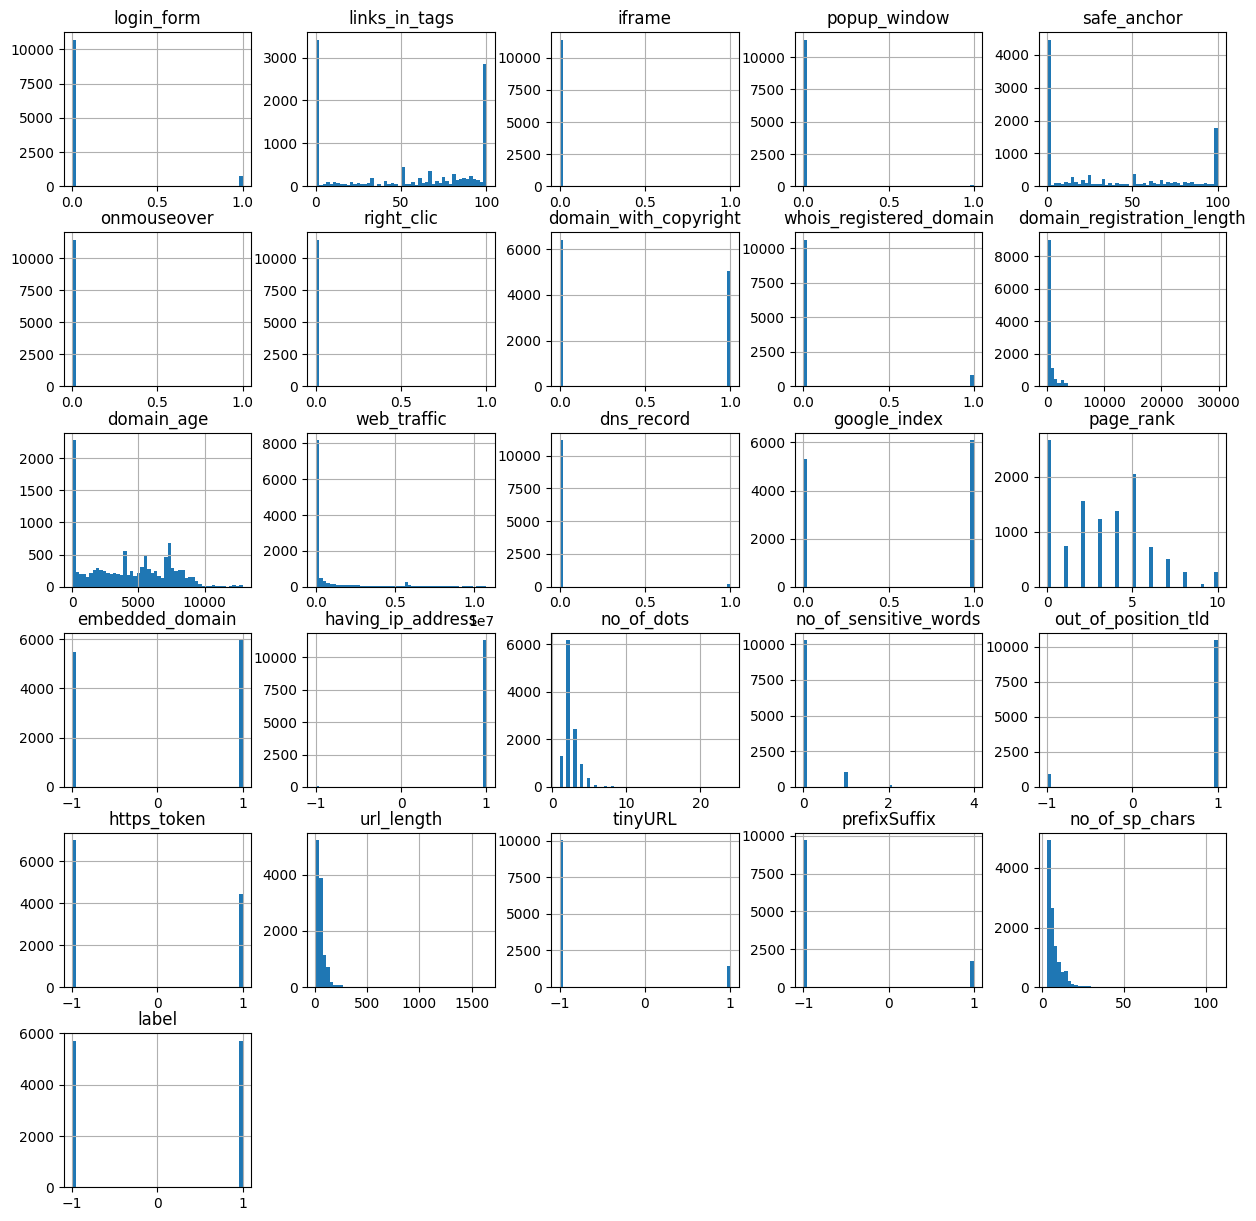

In [47]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (15,15))
plt.show()

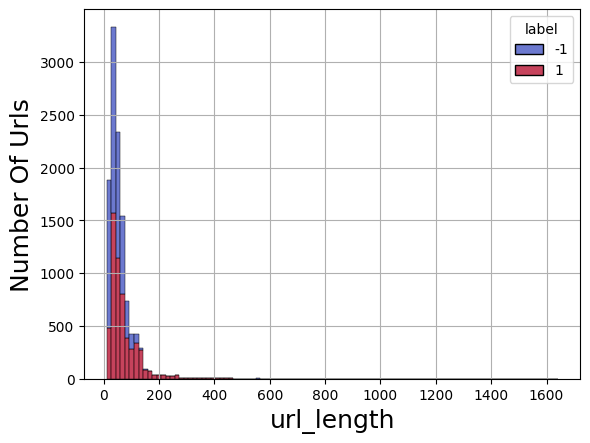

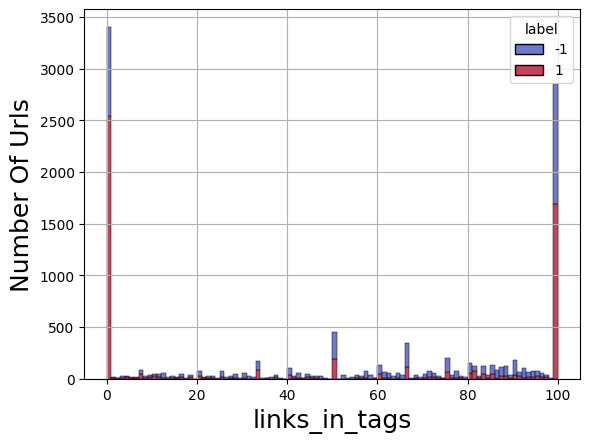

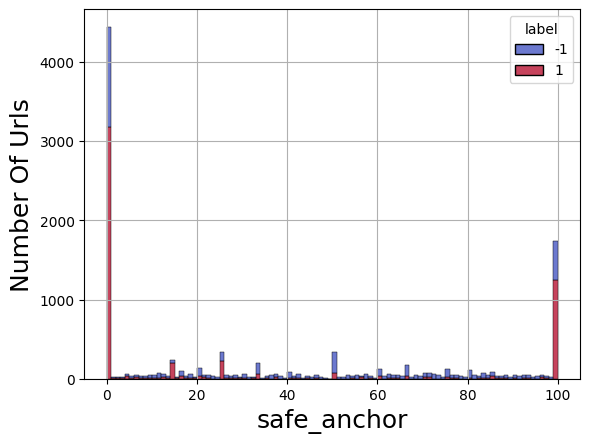

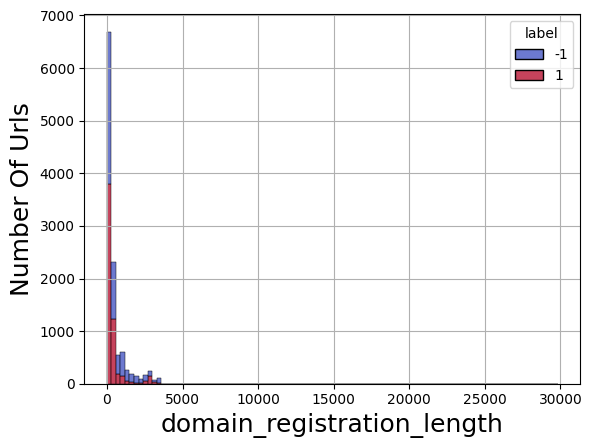

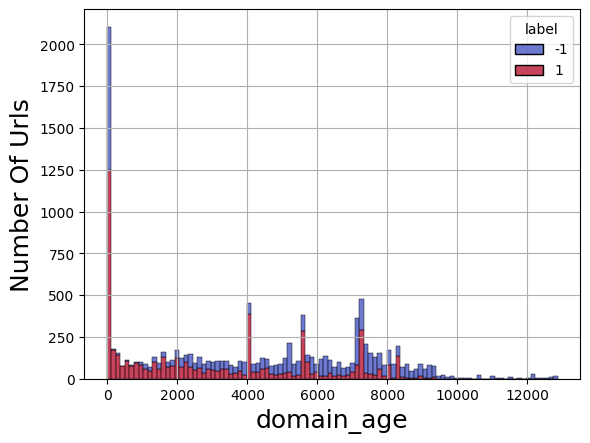

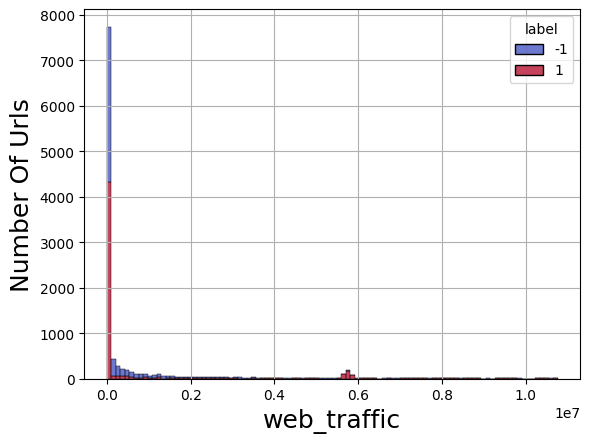

In [54]:
hist_features = ["url_length","links_in_tags","safe_anchor","domain_registration_length","domain_age","web_traffic"]

# plt.figure(figsize=(15, 10))
for i in hist_features:
    sns.histplot(data=df,x=i,bins=100,hue='label',multiple='stack', palette='coolwarm', edgecolor='black')
    plt.xlabel(i,fontsize=18)
    plt.ylabel("Number Of Urls",fontsize=18)
    plt.grid(True)
    plt.show()

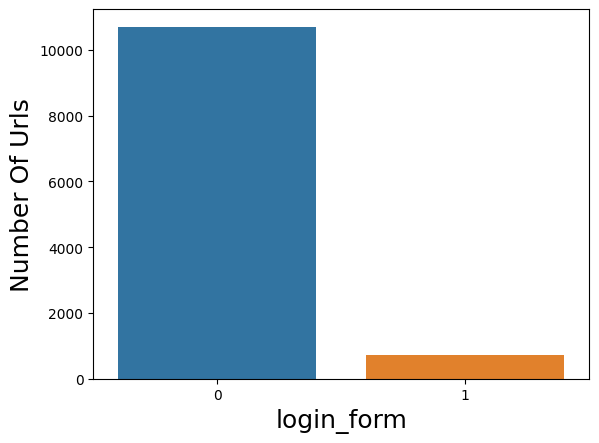

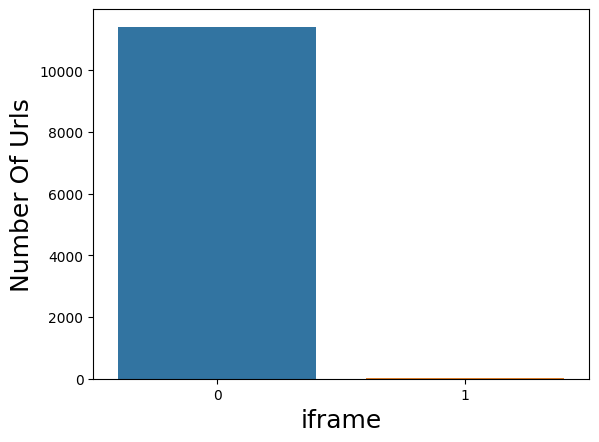

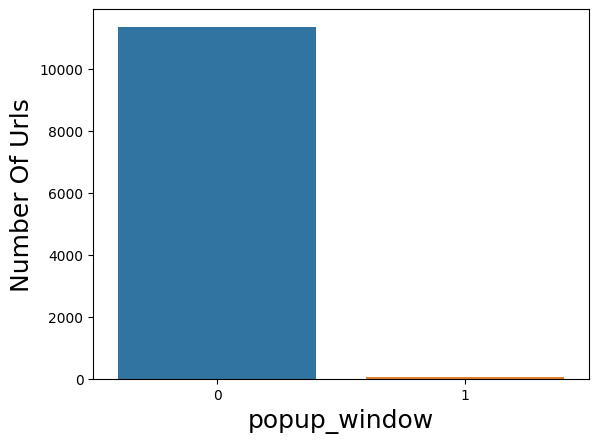

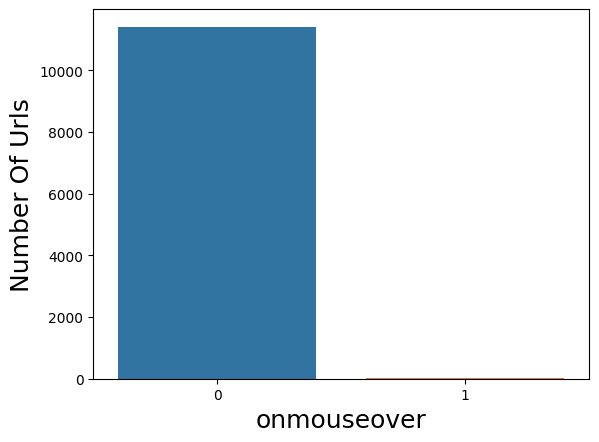

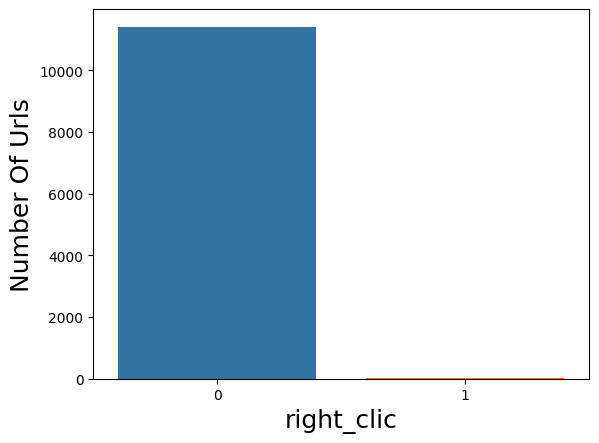

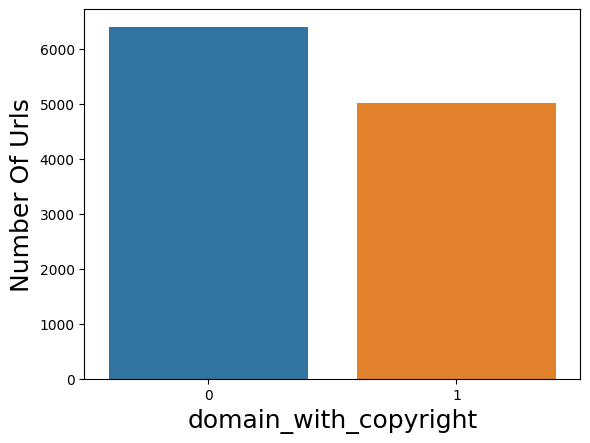

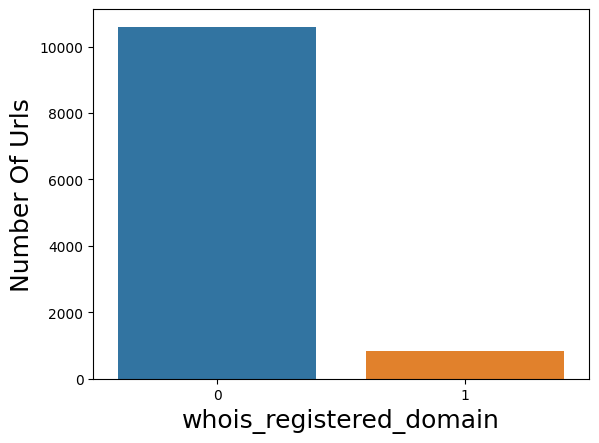

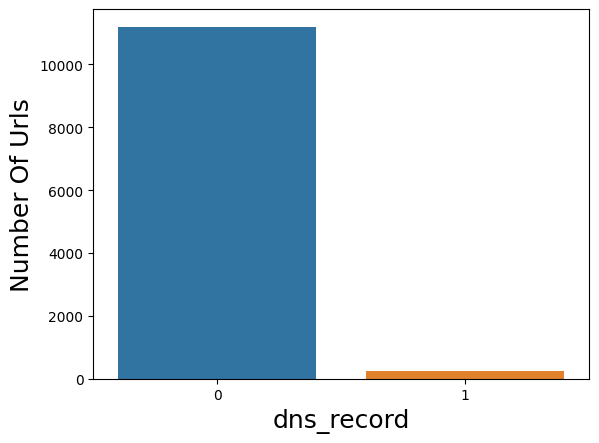

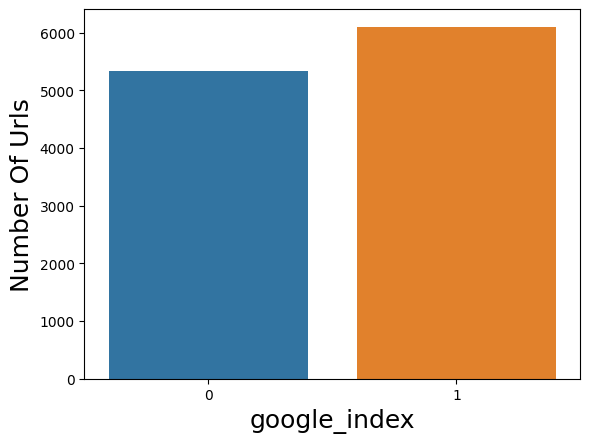

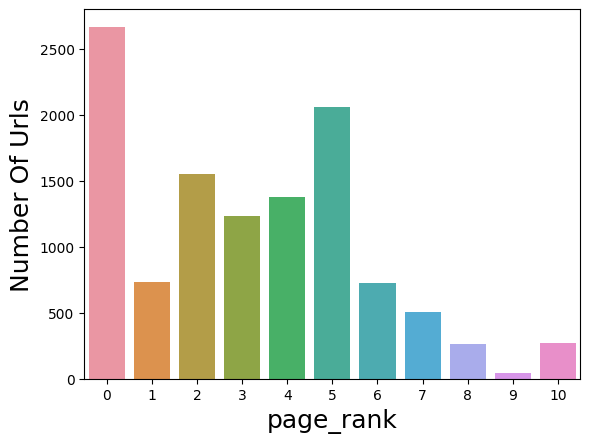

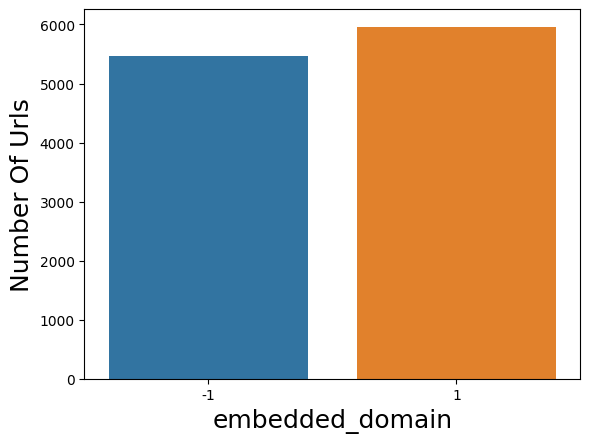

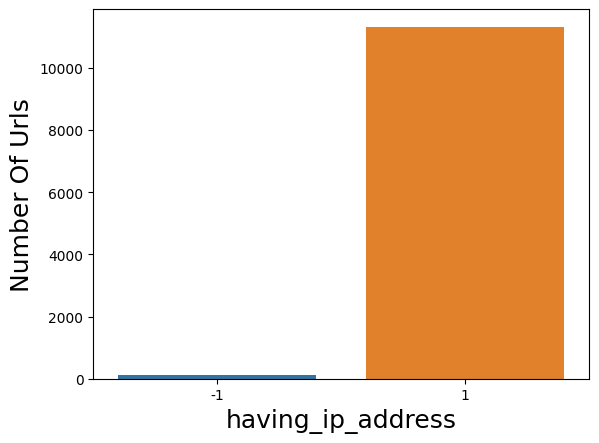

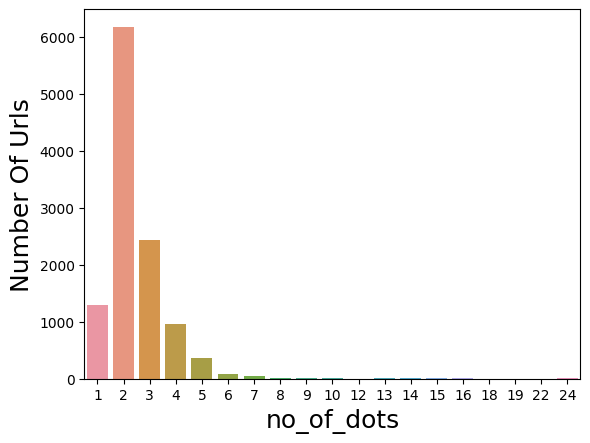

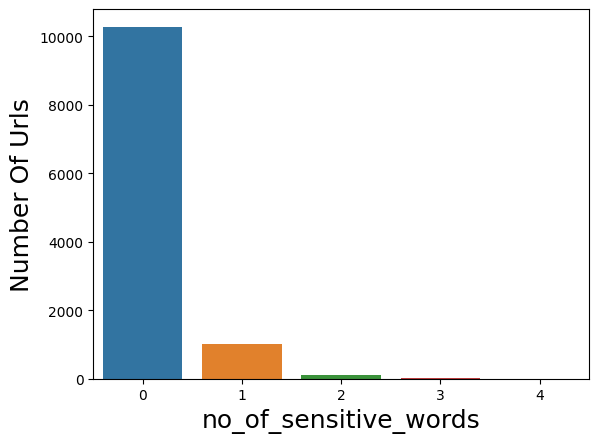

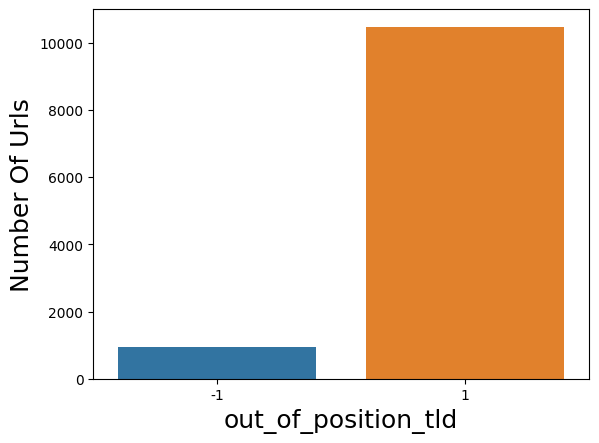

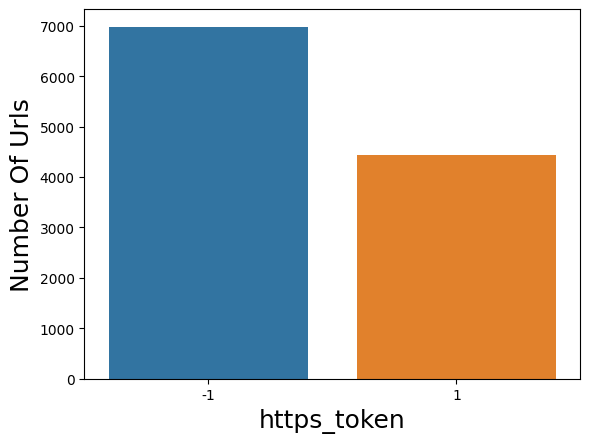

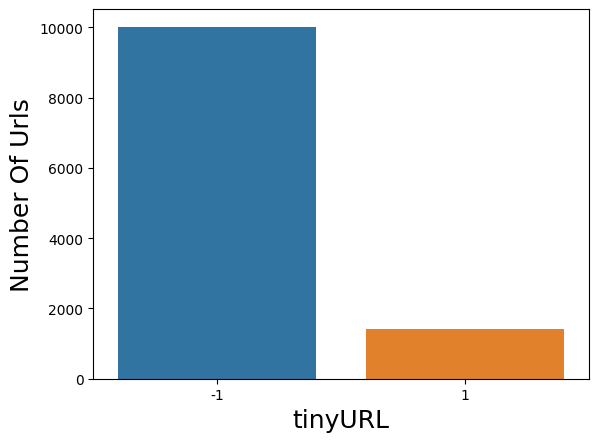

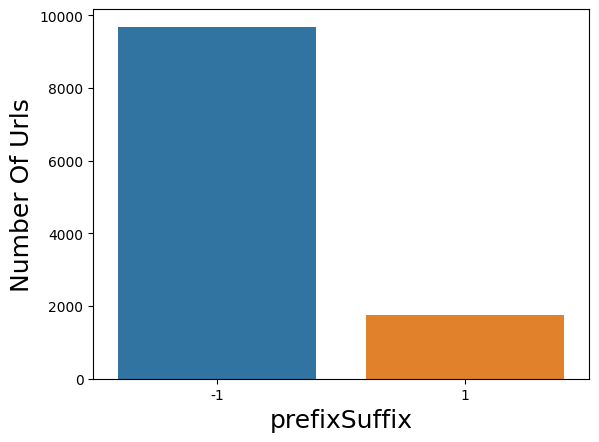

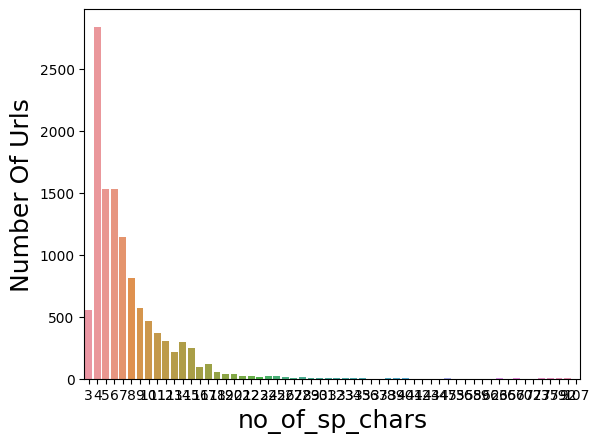

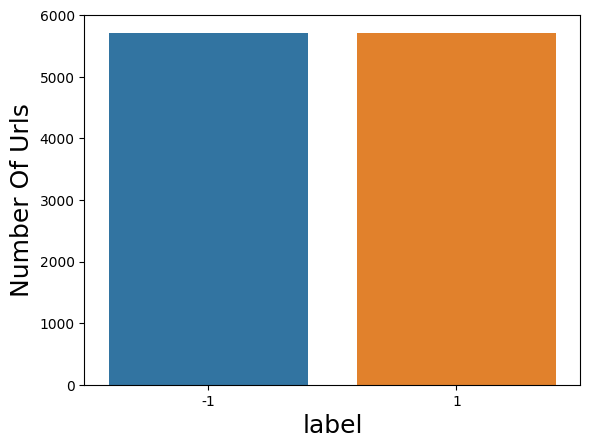

In [56]:
for i in df.columns:
    if i in hist_features:
        continue
    sns.countplot(x=i,data=df)
    plt.xlabel(i,fontsize=18)
    plt.ylabel("Number Of Urls",fontsize=18)
    plt.show()

<Axes: >

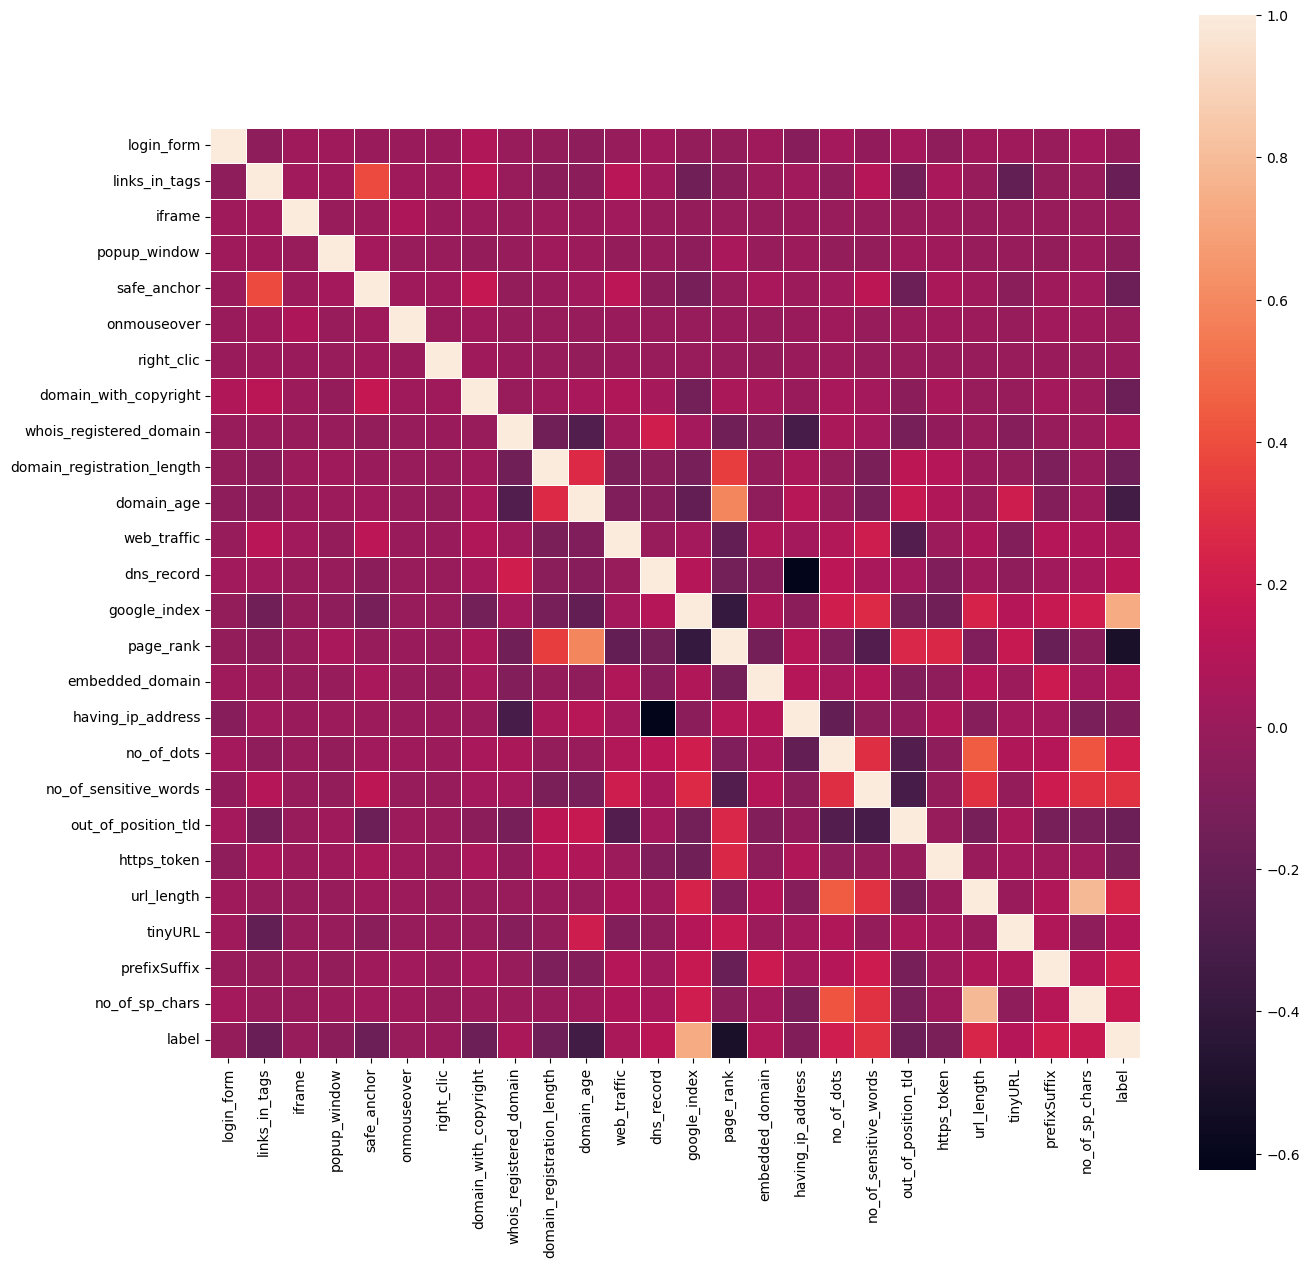

In [57]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), square=True,linewidths=.5)

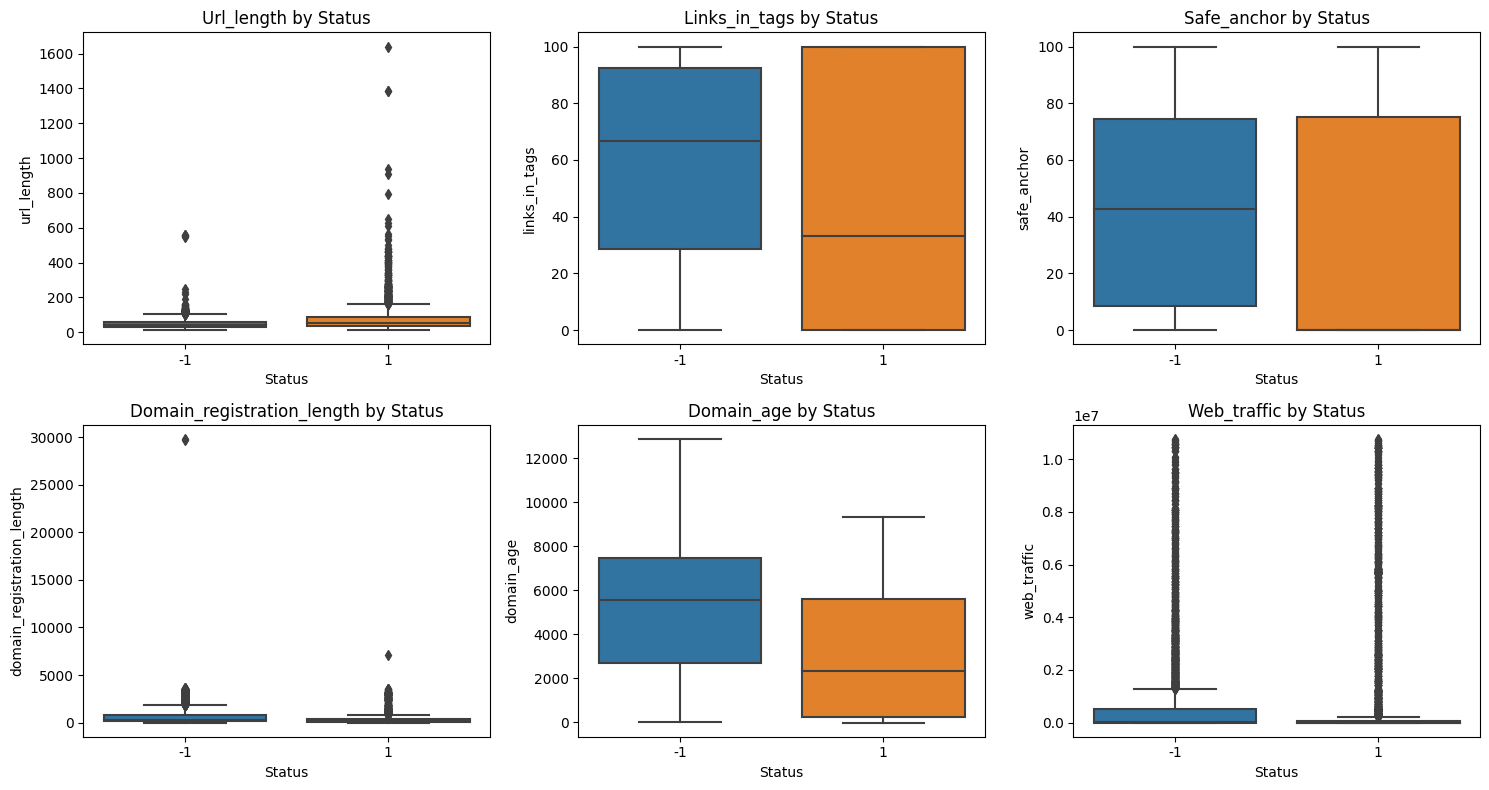

In [92]:
# Box plots for numerical features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(hist_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'{feature.capitalize()} by Status')
    plt.xlabel('Status')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

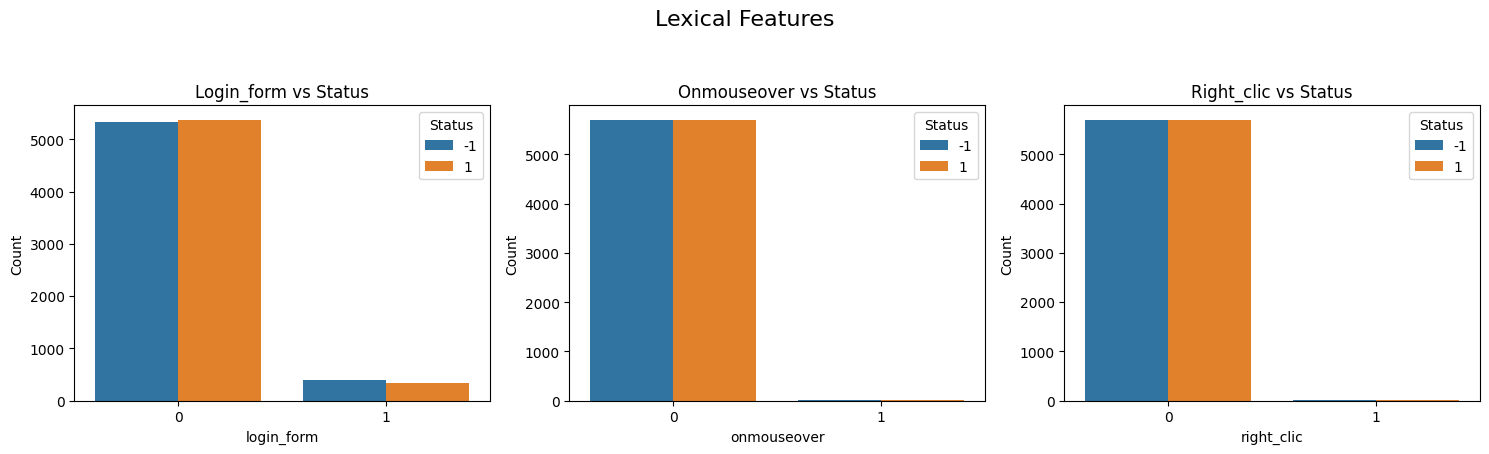

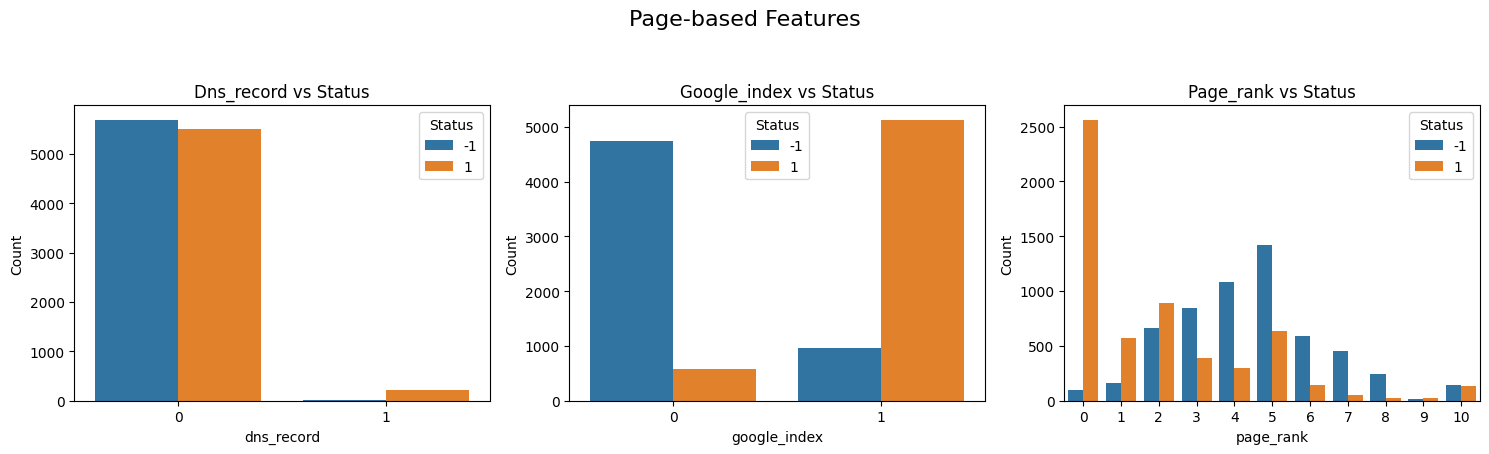

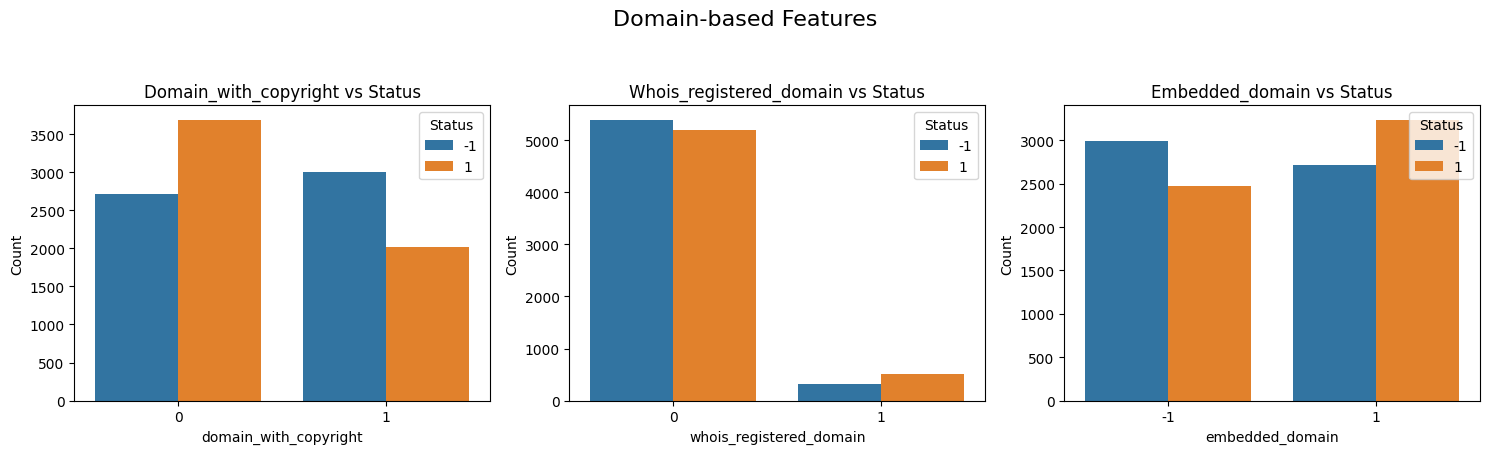

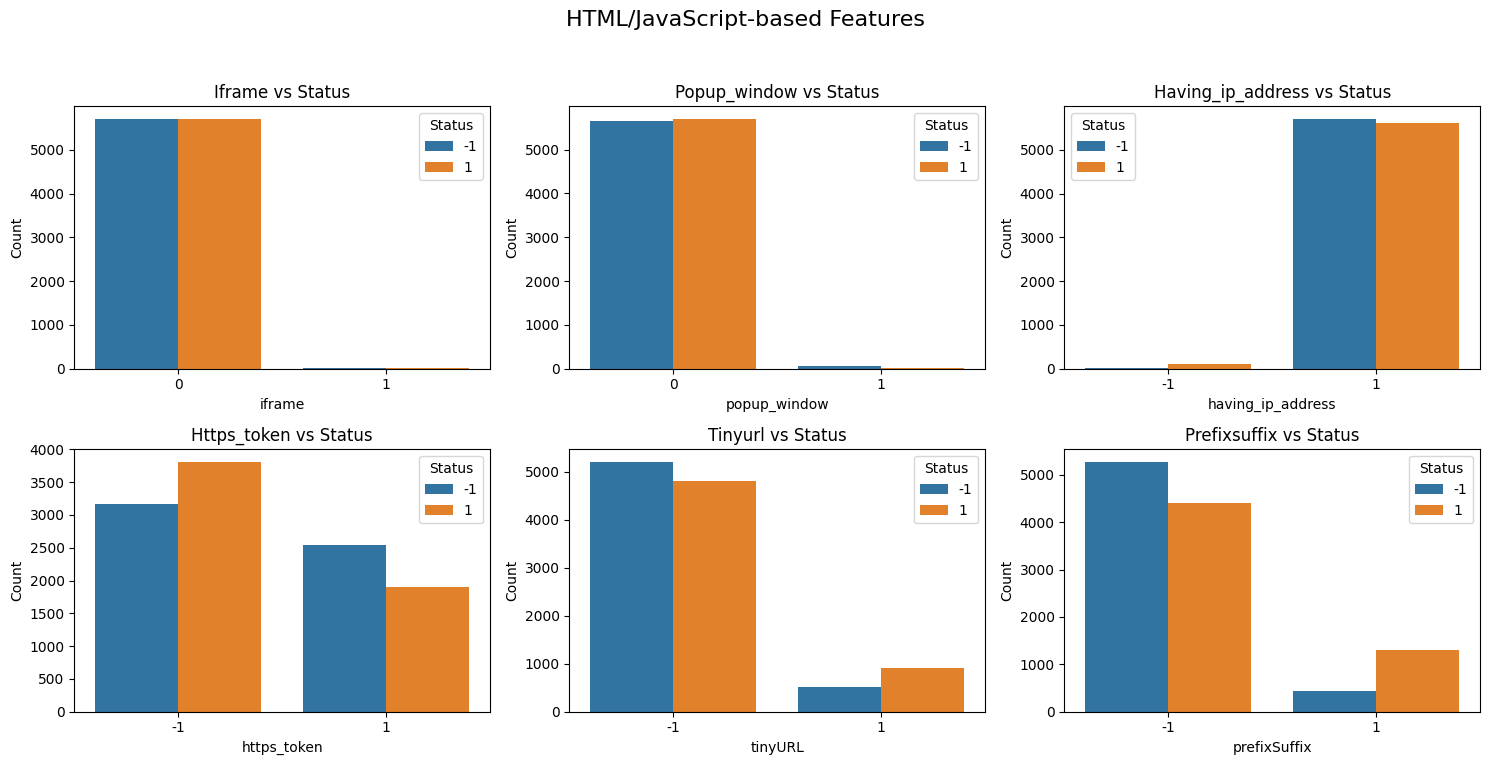

In [75]:
# Define groups of categorical features
lexical_features = ['login_form', 'onmouseover', 'right_clic']
page_based_features = ['dns_record', 'google_index', 'page_rank']
domain_based_features = ['domain_with_copyright', 'whois_registered_domain', 'embedded_domain']
html_javascript_based_features = ['iframe', 'popup_window', 'having_ip_address', 'https_token', 'tinyURL', 'prefixSuffix']

feature_groups = {
    'Lexical': lexical_features,
    'Page-based': page_based_features,
    'Domain-based': domain_based_features,
    'HTML/JavaScript-based': html_javascript_based_features
}

# Plot bar plots for each feature group
for group_name, group_features in feature_groups.items():
    plt.figure(figsize=(15, 8))
    for i, feature in enumerate(group_features, 1):
        plt.subplot(2, 3, i)
        sns.countplot(x=feature, hue='label', data=df)
        plt.title(f'{feature.capitalize()} vs Status')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Status')
    plt.suptitle(f'{group_name} Features', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
